    ## First code to learn how to open and plot ERA5 data

In [146]:
import os
import pandas
import numpy as np

import iris
from iris.analysis import MEAN
from iris.analysis.stats import pearsonr
import iris.coord_categorisation

from scipy.stats import theilslopes #theil-sen trends

import matplotlib.pyplot as plt

In [63]:
# directories
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

#si estoy trabajando desde el servidor vegeta
ruta_a_archivos_ERA5_mensual = "../../../../../datos/ERA5_updated/mon" #ruta donde estan los archivos con datos de ERA5
ruta_a_resultados = "/pikachu/datos/nadia.testani/Doctorado/resultados/resultados2024" #ruta donde se guardan los resultados del analisis de nubosidad

Current working directory: /home/nadia.testani/Doctorado/DoctoradoCodigos/codigos2024


/home/nadia.testani/anaconda3/envs/base_nadia/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


/home/nadia.testani/anaconda3/envs/base_nadia/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/home/nadia.testani/anaconda3/envs/base_nadia/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/home/nadia.testani/anaconda3/envs/base_nadia/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


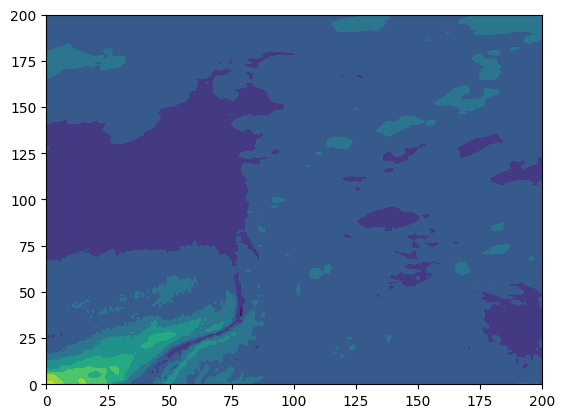

In [180]:
#open ERA5
ERA5_netcdf = iris.load_cube(f"{ruta_a_archivos_ERA5_mensual}/ERA5_precip.nc")

#time coord: convertion to dates
time_coord = ERA5_netcdf.coord('time')
time_axis = time_coord.units.num2date(time_coord.core_points())

#name of variable
variable_name = ERA5_netcdf.name()

#access to data
ERA5_data = ERA5_netcdf.data

#plot
plt.contourf(ERA5_data[1,:,:])

# regression
correlation_coefficient = pearsonr(ERA5_netcdf, ERA5_netcdf[:,0,0])
plt.contourf(correlation_coefficient.data)

#average one dimension 
ERA5_netcdf.collapsed('time',MEAN)

#slice 
ERA5_netcdf_subset = ERA5_netcdf[:,0:2,0:2]

#theil-sen trend
def calculate_theilsen_slope(y):
    slope, intercept, _, _ = theilslopes(y, range(len(y)), alpha=0.95)
    return slope, intercept
# Apply the Theil-Sen slope calculation to each grid point
trend_cube = ERA5_netcdf_subset[0:2,:,:].copy()
trend_cube.data = np.apply_along_axis(calculate_theilsen_slope, axis=0, arr=ERA5_netcdf_subset.data)

#filter theil-sen trend
def filter_theilsen_slope(y):
    #y: array 1D
    trend = calculate_theilsen_slope(y)[0] * np.arange(len(y)) + calculate_theilsen_slope(y)[1]
    filter_data = y - trend
    return filter_data
data_trend_filtered = ERA5_netcdf_subset[:,:,:].copy()
data_trend_filtered.data = np.apply_along_axis(filter_theilsen_slope, axis=0, arr=ERA5_netcdf_subset.data)

# calculate monthly mean
# Categorize the time coordinate by month
iris.coord_categorisation.add_month(ERA5_netcdf_subset, 'time', name='month')

# Calculate the monthly mean for each grid point
monthly_means = ERA5_netcdf_subset.aggregated_by('month', iris.analysis.MEAN)

# Filter monthly means --> anomalies
monthly_means_array = np.repeat(monthly_means.data, len(ERA5_netcdf_subset.data[:,1,1])/12, axis=0)
ERA5_anomalies = ERA5_netcdf_subset.data - monthly_means_array

masked_array(
  data=[[[-1.19171940e-04, -1.12538804e-04],
         [-1.28927752e-04, -9.73540253e-05]],

        [[-4.45950829e-05, -1.86748288e-05],
         [-6.59231660e-05, -6.52088283e-05]],

        [[-5.10241223e-05, -4.18193706e-05],
         [-3.37779690e-05, -5.74939810e-05]],

        ...,

        [[ 2.74775103e-04,  1.82850045e-04],
         [ 2.49344681e-04,  1.56664465e-04]],

        [[ 1.07620079e-04,  9.67009166e-05],
         [ 5.90451143e-05,  3.19411005e-05]],

        [[-1.67359121e-06, -1.38785613e-05],
         [ 4.61870355e-05,  8.79655868e-06]]],
  mask=False,
  fill_value=1e+20)

In [224]:
ERA5_netcdf_subset.Constraint(month = 1)

AttributeError: 'Cube' object has no attribute 'Constraint'

In [206]:
ERA5_netcdf_subset[:,1,1].aux_coords

(DimCoord(array([-10.25], dtype=float32), standard_name='latitude', units=Unit('degrees'), long_name='latitude', var_name='latitude'),
 DimCoord(array([-89.75], dtype=float32), standard_name='longitude', units=Unit('degrees'), long_name='longitude', var_name='longitude'),
 AuxCoord(array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
        'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar',
        'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
        'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar',
        'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
        'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        

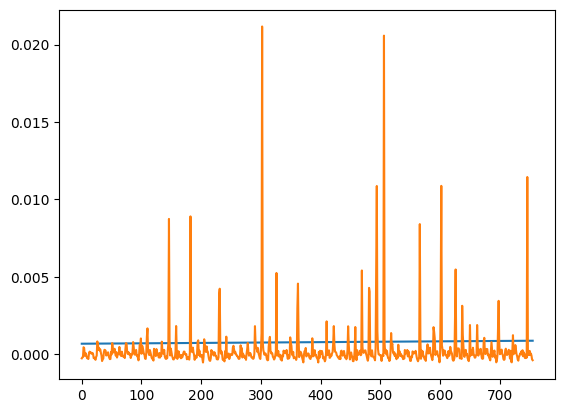

In [137]:
a = trend_cube[0,1,1].data*np.arange(len(ERA5_netcdf_subset[:,1,1].data)) + trend_cube[1,1,1].data
plt.plot(ERA5_netcdf_subset[:,1,1].data - a) #tendency filter

In [129]:
trend_cube[0,1,1]

Total Precipitation (m),(scalar cube)
Scalar coordinates,
latitude,-10.25 degrees
longitude,-89.75 degrees
time,1959-01-01 00:00:00
Attributes,
Conventions,CF-1.6
history,2022-09-06 13:37:04 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin...


In [121]:
trend_cube.data

array([[[3.38370495e-07, 2.70696396e-07],
        [2.87967390e-07, 2.55337735e-07]],

       [[7.91617773e-04, 6.46152298e-04],
        [7.66927478e-04, 6.77666350e-04]]])

In [66]:
#apply the same function to all grid-points

# Define your custom function
def custom_function(value):
    # Modify this function according to your specific requirements
    return value * 2  # Example: doubling the values

# Apply the custom function to all grid points
ERA5_netcdf.data = np.vectorize(custom_function)(ERA5_netcdf.data)

In [ ]:
#regression example
dataset = 
pearsonr(dataset, reference, **kwargs)